<a href="https://colab.research.google.com/github/mms-11/ML_algorithms/blob/main/Copy_of_PFI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title abrir meu drive
from google.colab import drive

drive.mount('/content/MyDrive')



Mounted at /content/MyDrive


In [ ]:
# @title importar bibliotecas
import pandas as pd

import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np


In [ ]:
# @title Ler dataset diabetes
df = pd.read_csv('/content/MyDrive/My Drive/diabetes.csv')

df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
# @title treinar base de dados
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
Y = df['class']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


In [ ]:
# @title arvore aleatoria
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, Y_train)

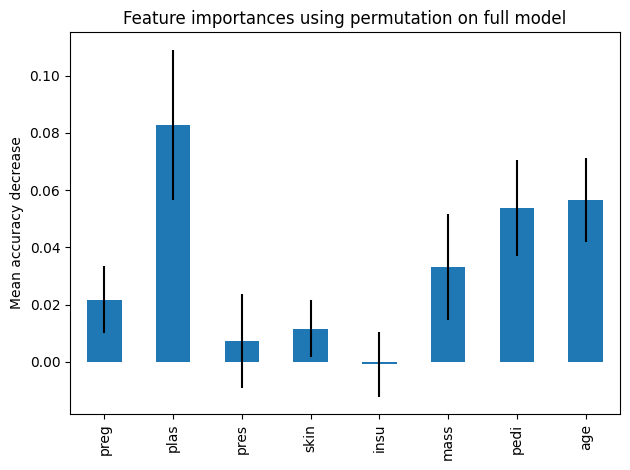

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=30, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
# @title testando o modelo arvore aleatoria
from sklearn.metrics import accuracy_score

Yhat = rf.predict(X_test)

print("Acurácia do modelo RF  : ", accuracy_score(Y_test,Yhat))

Acurácia do modelo RF  :  0.7604166666666666


In [ ]:
# @title importar modelo knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Yhat_knn = knn.predict(X_test)

print("Acurácia do modelo KNN  : ", accuracy_score(Y_test,Yhat_knn))

Acurácia do modelo KNN  :  0.6302083333333334


In [ ]:
Yhat_knn

array(['tested_negative', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_positive', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negati

In [ ]:
# @title Gerar o novo dataset para interpretar o modelo (new_df = prediçoes do black box)
new_df = pd.read_csv('/content/MyDrive/My Drive/2023.2/predicao.csv')

new_df.head()

,array(['tested_negative','tested_positive','tested_negative',Unnamed: 3
0,'tested_negative','tested_positive','tested_negative',NaN
1,'tested_positive','tested_negative','tested_positive',NaN
2,'tested_negative','tested_negative','tested_positive',NaN
3,'tested_negative','tested_positive','tested_negative',NaN
4,'tested_negative','tested_positive','tested_negative',NaN


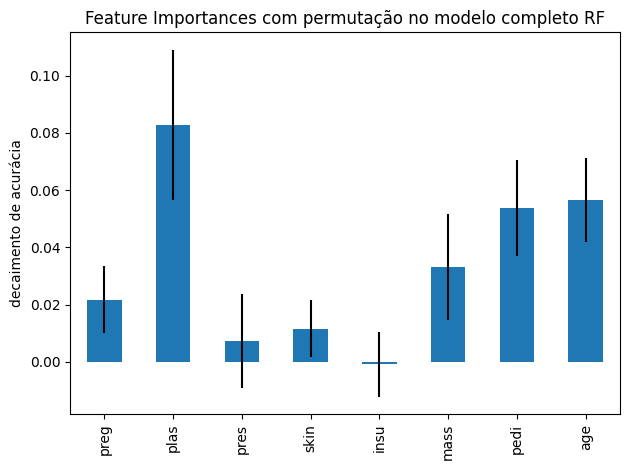

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test, n_repeats= 30, random_state= 0 )

forest_importances = pd.Series(result.importances_mean, index = X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr = result.importances_std, ax = ax)


ax.set_title("Feature Importances com permutação no modelo completo RF")
ax.set_ylabel("decaimento de acurácia")
fig.tight_layout()
plt.show()

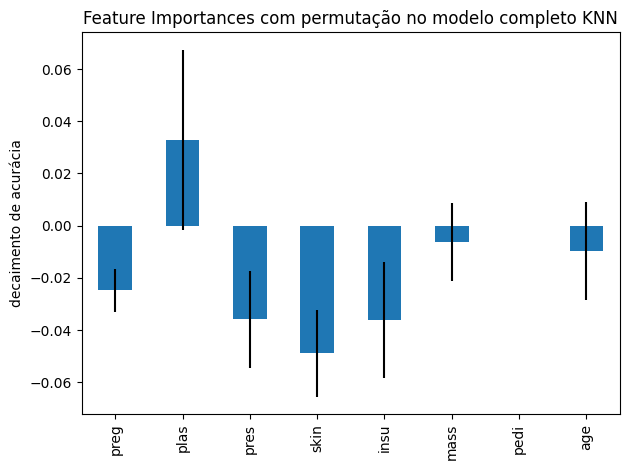

In [ ]:
result2 = permutation_importance(knn, X_test, Y_test, n_repeats= 30, random_state= 0 )

forest_importances = pd.Series(result2.importances_mean, index = X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr = result2.importances_std, ax = ax)


ax.set_title("Feature Importances com permutação no modelo completo KNN")
ax.set_ylabel("decaimento de acurácia")
fig.tight_layout()
plt.show()